<a href="https://colab.research.google.com/github/ingridmidory/content/blob/main/Complejos_simpliciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complejos simpliciales

En este Notebook se presentan algunas fuciones básicas para el tratamiento de complejos simpliciales con Gudhi. Primero se importan las bibliotecas necesarias (a veces se debe instalar la biblioteca Gudhi).



In [3]:
! pip install gudhi
import numpy as np
import gudhi as gd
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.7 MB 1.2 MB/s 


Se inicializa un complejo simplicial vacío y se puede completar de manera manual con arreglos de números que corresponden a los simplejos del complejo simplicial. También se pueden importar los complejos.

In [4]:
complejo = gd.SimplexTree() #Se inicializa un complejo simplicial vacío
complejo.insert([0,1]) # Función que inserta un nuevo 1-simplejo al complejo simplicial
complejo.insert([1,2])
complejo.insert([2,0])
complejo.insert([0,1,2])
complejo.insert([0,3])
complejo.insert([4])

True

Algunas de las propiedades de los complejos simpliciales que se pueden calcular con Gudhi: dimensión, números de simplejos y vértices. También se puede calcular el p-esqueleto de un complejo simplicial para $p\geq 0$ , y éste es un objeto iterable.

In [5]:
print("dimensión=",complejo.dimension())
print("número de simplejos=", complejo.num_simplices())
print("número de vértices=", complejo.num_vertices())
print("0-esqueleto=", complejo.get_skeleton(0))
print("1-esqueleto=", complejo.get_skeleton(1))
print("2-esqueleto=", complejo.get_skeleton(2))


dimensión= 2
número de simplejos= 10
número de vértices= 5
0-esqueleto= <generator object at 0x7f57526ad9f0>
1-esqueleto= <generator object at 0x7f57526ad9f0>
2-esqueleto= <generator object at 0x7f57526ad9f0>


In [6]:
complejo_colaps = complejo
complejo_colaps.collapse_edges(2)
print("dimensión=",complejo_colaps.dimension())
print("número de simplejos=", complejo_colaps.num_simplices())
print("número de vértices=", complejo_colaps.num_vertices())
#complejo_colaps.expansion(3)
#print("dimensión=",complejo_colaps.dimension())
#print("número de simplejos=", complejo_colaps.num_simplices())
#print("número de vértices=", complejo_colaps.num_vertices())

dimensión= 1
número de simplejos= 8
número de vértices= 5


# Gráficas de complejos simpliciales

---

Este método de graficación de complejos simpliciales de dimensión a lo más 3 se basa en Matplotlib. Primero se definen los puntos en R^3 que corresponden a los vértices del complejo. A partir de estos vértices se definen los simplejos de dimensiones superiores.

In [7]:
# Coordenadas de los puntos
puntos=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1], [1,0,1]])
# Lista de 2-simplejos
triangulos = np.array([s[0] for s in complejo.get_skeleton(2) if len(s[0])==3])
# Lista de 1-simplejos
aristas = []
for s in complejo.get_skeleton(1):
    e = s[0]
    if len(e) == 2:
        aristas.append(puntos[[e[0],e[1]]])

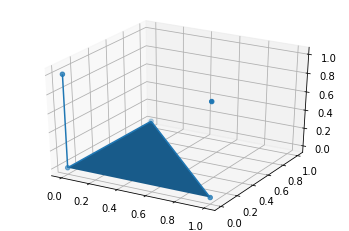

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Gráfica triángulos
ax.plot_trisurf(puntos[:,0], puntos[:,1], puntos[:,2], triangles=triangulos)
# Gráfica puntos
ax.scatter3D(puntos[:,0], puntos[:,1], puntos[:,2])
# Gráfica aristas
ax.add_collection3d(Line3DCollection(segments=aristas))
plt.show()

Aquí definimos el complejo simplicial formado por el 3-simplejo  𝜎=[0,1,2,3]  y todas sus caras. Notar que basta con insertar en el complejo a  𝜎  y el algoritmo automáticamente lo completa a un complejo simplicial agregando las caras faltantes.

In [9]:
complejo2 = gd.SimplexTree() 
complejo2.insert([0,1,2,3]) 
print("dimensión=",complejo2.dimension())
print("número de simplejos=", complejo2.num_simplices())
print("número de vértices=", complejo2.num_vertices())

dimensión= 3
número de simplejos= 15
número de vértices= 4


In [10]:
# Coordenadas de los puntos
puntos=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1]])
# Lista de 2-simplejos
triangulos = np.array([s[0] for s in complejo2.get_skeleton(2) if len(s[0])==3])
# Lista de 1-simplejos
aristas = []
for s in complejo2.get_skeleton(1):
    e = s[0]
    if len(e) == 2:
        aristas.append(puntos[[e[0],e[1]]])

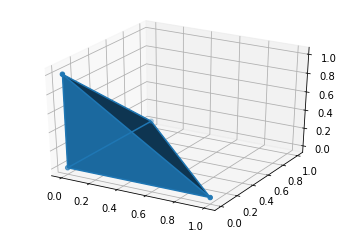

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Gráfica triángulos
ax.plot_trisurf(puntos[:,0], puntos[:,1], puntos[:,2], triangles=triangulos)
# Gráfica puntos
ax.scatter3D(puntos[:,0], puntos[:,1], puntos[:,2])
# Gráfica aristas
ax.add_collection3d(Line3DCollection(segments=aristas))
plt.show()

Dado un simplejo $\sigma$ en un complejo simplicial $K$ se pueden calcular en Gudhi las caras de $\sigma$ de dimensión $dim(\sigma)-1$ con la función get_boundaries. También se pueden calcular las cocaras de $\sigma$ de cierta dimensión mayor a $dim(\sigma)$ (Una cocara de $\sigma$ es cualquier simplejo de $K$ que tiene a $\sigma$ como una cara). 

In [12]:
for bd in complejo2.get_boundaries([0,1,2,3]):
    print(bd)

([0, 1, 2], 0.0)
([0, 1, 3], 0.0)
([0, 2, 3], 0.0)
([1, 2, 3], 0.0)


In [13]:
print("cocaras de [0] de dimensión 1")
for cf in complejo2.get_cofaces([0],1):
    print(cf)
print("cocaras de [0] de dimensión 2")
for cf in complejo2.get_cofaces([0],2):
    print(cf)

cocaras de [0] de dimensión 1
([0, 1], 0.0)
([0, 2], 0.0)
([0, 3], 0.0)
cocaras de [0] de dimensión 2
([0, 1, 2], 0.0)
([0, 1, 3], 0.0)
([0, 2, 3], 0.0)


## Cálculo de la Homología Simplicial

Para el cálculo de la homología simplicial, primero se debe llamar a la función 'compute_persistence()'. Uno de los parámetros que se pueden incluir en la función es el campo de coeficientes mediante un entero primo $p$, para representar a $\mathbb{Z}_{p}$. Recordar que el $i$-ésimo número de Betti $b_{i}$ es el rango del grupo de homología $H_{i}(K,\mathbb{Z}_{p})$. La función 'betti_numbers()' regresa el arreglo de números de Betti $(b_{0},b_{1},...,b_{max})$.

In [14]:
complejo.compute_persistence(homology_coeff_field=7)
print("Los números de Betti del complejo 1 son",complejo.betti_numbers())

Los números de Betti del complejo 1 son [2]


In [15]:
complejo2.compute_persistence()
print("Los números de Betti del complejo 2 son",complejo2.betti_numbers())

Los números de Betti del complejo 2 son [1, 0, 0]


In [16]:
anillo = gd.SimplexTree() #Se inicializa un complejo simplicial vacío
anillo.insert([0,1,2]) # Se incertan de manera manual los 2-simplejos de la triangulación del toro
anillo.insert([1,3,2])
anillo.insert([2,3,4])
anillo.insert([4,3,5])
anillo.insert([4,5,0])
anillo.insert([0,5,1])

True

In [17]:
print("dimensión=",anillo.dimension())
print("número de simplejos=", anillo.num_simplices())
print("número de vértices=", anillo.num_vertices())

dimensión= 2
número de simplejos= 24
número de vértices= 6


In [18]:
anillo.compute_persistence()
print("Los números de Betti del anillo son",anillo.betti_numbers())

Los números de Betti del anillo son [1, 1]


𝐄𝐣𝐞𝐫𝐜𝐢𝐜𝐢𝐨 15 : Calcular los grupos de homología simplicial de la banda de Möbius y del toro.